# Kiplinger's 100 Best Values in Public Colleges (2011), a data story

In this notebook, I am trying to answer the following questions: 
1. Are there any interesting trends?
2. Are there any anomalies?
3. Is there a possibility of a bar plot?
4. Is there a possibility of a scatter plot?

After doing some exploratory data analysis using various plots, I aim to gain some insights to the data and suggest any hypothesis to investigate further.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
scorecard=pd.read_csv('scorecard.csv')

In [3]:
scorecard.shape

(100, 11)

In [4]:
scorecard.columns

Index(['Rank(Instate)', 'Rank(Out ofstate)', 'Name', 'State', 'Adm. rate',
       '4-Yr grad. rate', 'Total cost per yr. (In state)',
       'Total cost per yr. (Out of state)', 'Average need-based aid',
       'Average non-need-based aid', 'Average debt at graduation'],
      dtype='object')

Is there a trend betwen In-State and Out-of-State costs?

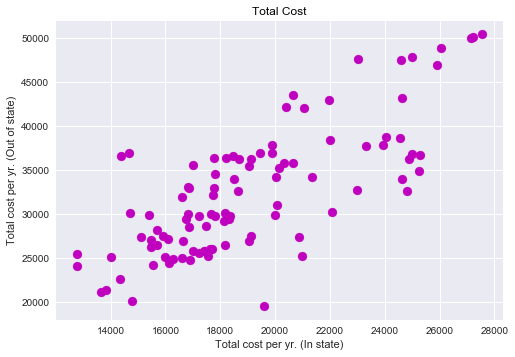

In [5]:
plt.figure();
scorecard.plot.scatter(x='Total cost per yr. (In state)', y='Total cost per yr. (Out of state)',s=80, c='m')
plt.title('Total Cost', color='black')
plt.show()

Looks like there is a positive trend. The Colleges with high In-state tuitions also have higher out-of-state tuitions

## Linear Regression with ordinary least squares
I have not separated data into Train and Test sets. 

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.linear_model import Ridge

In [7]:
scorecard['Total cost per yr. (Out of state)'].shape

(100,)

In [8]:
X_train = scorecard['Total cost per yr. (In state)'].values.reshape(-1,1)
y_train = scorecard['Total cost per yr. (Out of state)'].values.reshape(-1,1)
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [9]:
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [[ 1.52828939]]
lr.intercept_: [ 3345.6114923]


### training performance, R^2

In [10]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Mean squared error: %.2f"
      % np.mean((lr.predict(X_train) - y_train) ** 2))

Training set score: 0.58
Mean squared error: 21611597.97


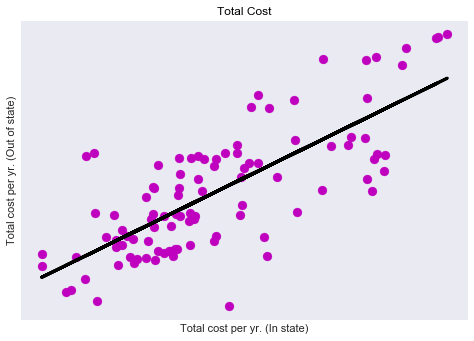

In [11]:
plt.figure();
scorecard.plot.scatter(x='Total cost per yr. (In state)', y='Total cost per yr. (Out of state)',s=80, c='m')
plt.title('Total Cost', color='black')
plt.plot(X_train, lr.predict(X_train),  color='black',linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

## Lets try Ridge Regression

In [12]:
ridge = Ridge(alpha=5).fit(X_train, y_train)

In [13]:
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))

Training set score: 0.58


Changing Alpha value did not change the R2 value. Ridge regression was not a better fit for this data.

## Number of Top-100 colleges per states ordered alphabetically

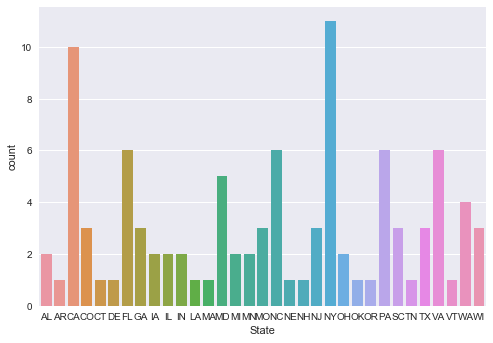

In [14]:
sns.countplot(x='State', data=scorecard.sort_values(['State'],ascending=[True]))
sns.despine()
plt.show()

In [15]:
StateName_Counts=scorecard['State'].value_counts().head(10)
StateName_Counts

NY    11
CA    10
VA     6
PA     6
FL     6
NC     6
MD     5
WA     4
MO     3
WI     3
Name: State, dtype: int64

NY has the most College ranked in Top-100.

Lets see if there is a trend between Acceptance rate and 4-year Graduation rate.

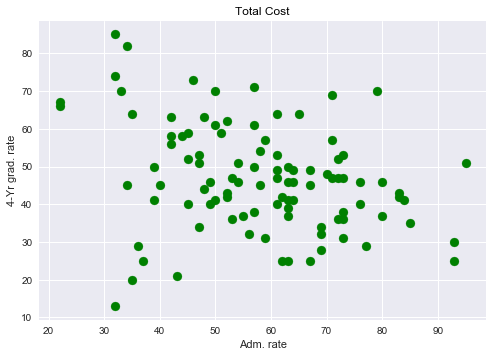

In [16]:
plt.figure();
scorecard.plot.scatter(x='Adm. rate', y='4-Yr grad. rate',s=80, c='g')
plt.title('Total Cost', color='black')
plt.show()

In [17]:
X_train2 = scorecard['Adm. rate'].values.reshape(-1,1)
y_train2 = scorecard['4-Yr grad. rate'].values.reshape(-1,1)
lr2 = linear_model.LinearRegression()
lr2.fit(X_train2, y_train2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
print("lr2.coef_: {}".format(lr2.coef_))
print("lr2.intercept_: {}".format(lr2.intercept_))
print("Training set score: {:.2f}".format(lr2.score(X_train2, y_train2)))

lr2.coef_: [[-0.2705743]]
lr2.intercept_: [ 62.55978045]
Training set score: 0.09


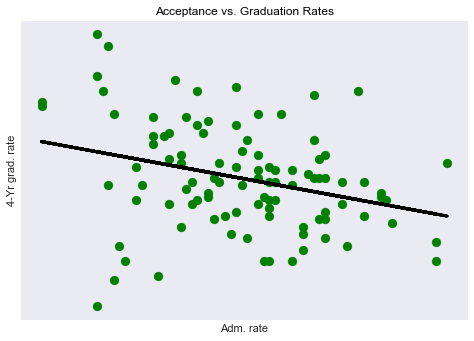

In [19]:
plt.figure();
scorecard.plot.scatter(x='Adm. rate', y='4-Yr grad. rate',s=80, c='g')
plt.title('Acceptance vs. Graduation Rates', color='black')
plt.plot(X_train2, lr2.predict(X_train2),  color='black',linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

Seems that there is a slight negative relatipship between Acceptance and 4-year Graduation rates. 

### Cost vs. Ranking
#### Are expensive colleges better ranked?

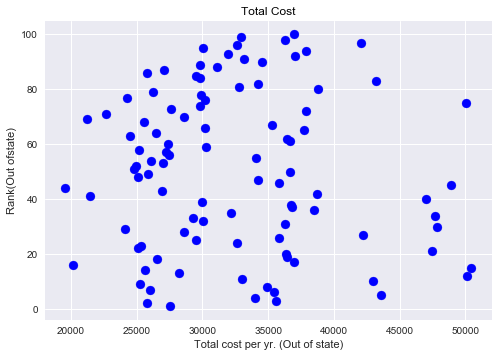

In [20]:
plt.figure();
scorecard.plot.scatter(x='Total cost per yr. (Out of state)', y='Rank(Out ofstate)',s=80, c='b')
plt.title('Total Cost', color='black')
plt.show()

No obvious relationship here.

### Lets look at the correlation map

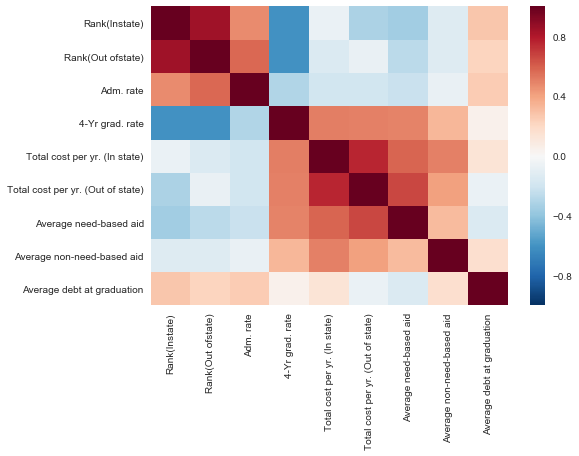

In [21]:
corr = scorecard.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

This map is quite useful, before going forward with pairwise linear regression

In [22]:
scorecard.iloc[:5].head(3)

,Rank(Instate),Rank(Out ofstate),Name,State,Adm. rate,4-Yr grad. rate,Total cost per yr. (In state),Total cost per yr. (Out of state),Average need-based aid,Average non-need-based aid,Average debt at graduation
0,1,3,The University of North Carolina at Chapel Hil...,NC,32,74,17000,35614,9980,5219,14262.0
1,2,17,"University of Florida, Gainesville",FL,42,58,14684,36961,6415,4925,15932.0
2,3,5,"University of Virginia, Charlottesville",VA,32,85,20647,43593,14955,9880,19939.0


### Out-of-state and In-state costs binned. 

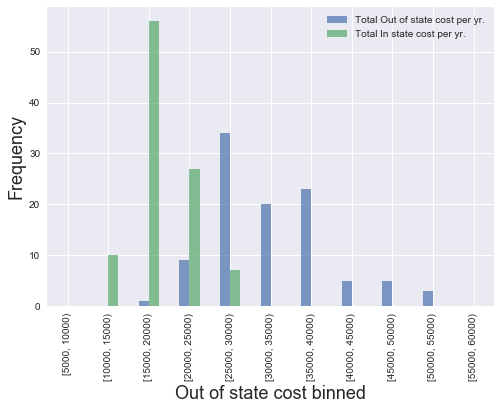

In [23]:
step = 5000
bin_range = np.arange(5000, 60000+step, step)
out1, bins1  = pd.cut(scorecard['Total cost per yr. (Out of state)'], bins=bin_range, include_lowest=True, right=False, retbins=True)
out2, bins2  = pd.cut(scorecard['Total cost per yr. (In state)'], bins=bin_range, include_lowest=True, right=False, retbins=True)
pd.concat([out1.value_counts(sort=False).rename('Total Out of state cost per yr.'),out2.value_counts(sort=False).rename('Total In state cost per yr.')],axis=1).plot.bar(alpha=0.7, align='center')
#out2.value_counts(sort=False).plot.bar(color='b', alpha=0.5, align='center')
plt.xlabel('Out of state cost binned', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.show()

In [24]:
print("Mean Out-of-state cost: {:.2f}".format(scorecard['Total cost per yr. (Out of state)'].mean()))
print("Mean In-state cost: {:.2f}".format(scorecard['Total cost per yr. (In state)'].mean()))
print("Median Out-of-state cost: {:.2f}".format(scorecard['Total cost per yr. (Out of state)'].median()))
print("Median In-state cost: {:.2f}".format(scorecard['Total cost per yr. (In state)'].median()))

Mean Out-of-state cost: 32548.70
Mean In-state cost: 19108.35
Median Out-of-state cost: 31518.50
Median In-state cost: 18202.00


In [25]:
out1.value_counts().head(10)

[25000, 30000)    34
[35000, 40000)    23
[30000, 35000)    20
[20000, 25000)     9
[45000, 50000)     5
[40000, 45000)     5
[50000, 55000)     3
[15000, 20000)     1
[55000, 60000)     0
[10000, 15000)     0
Name: Total cost per yr. (Out of state), dtype: int64

There are 3 schools with Out-of-State cost between 50-55k USD. 
Lets find these schools and their rankings!

In [26]:
df = scorecard.loc[:,'Total cost per yr. (Out of state)']

In [27]:
df[df>50000].index.tolist()

[12, 15, 68]

one school is way down the list at 68th and has over 50k Out-of-state tuition, lets find that school

In [28]:
scorecard.iloc[68]

Rank(Instate)                                                                      69
Rank(Out ofstate)                                                                  75
Name                                 University of California, Santa Cruz, Santa Cruz
State                                                                              CA
Adm. rate                                                                          64
4-Yr grad. rate                                                                    49
Total cost per yr. (In state)                                                   27135
Total cost per yr. (Out of state)                                               50013
Average need-based aid                                                          13735
Average non-need-based aid                                                       8010
Average debt at graduation                                                      16024
Name: 68, dtype: object

UC Santa Cruz is ranked 75th (out of state) and is an anomaly in terms of Cost vs. Ranking

## Conclusion

I have performed Exploratory Data Analysis on Kiplingers Top-100 Public College List from 2011.

The following was achieved: 
* Scatter plots
* Bar plots with binning
* Linear Regression and building trends
* Correlation map to look at relationship between data.
* Countplot for looking at which states has the most Top-100 colleges.
* Sorting, indexing, simple data analysis
* Anomaly detection using histogram and Pandas builtin functions for searching, indexing, locating

Although the dataset is small, the information extracted is valueable.